<a href="https://colab.research.google.com/github/CaptainMarlow/IAD_labs/blob/main/IAD_Lab2_Sliepyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import set_config

set_config(display='text')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB

import time
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nba_logreg.csv')
df = df.drop('name', axis=1)
df.dropna(inplace=True)

In [3]:
y = df['target_5yrs']
X = df.drop('target_5yrs', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (930, 19)
Розмір тестової вибірки: (399, 19)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Приклад нормалізації (перша ознака):")
print(f"До нормалізації - середнє: {X_train.iloc[:, 0].mean():.2f}, std: {X_train.iloc[:, 0].std():.2f}")
print(f"Після нормалізації - середнє: {X_train_scaled[:, 0].mean():.2f}, std: {X_train_scaled[:, 0].std():.2f}")


Приклад нормалізації (перша ознака):
До нормалізації - середнє: 60.38, std: 17.38
Після нормалізації - середнє: -0.00, std: 1.00


5.3 Навчання SVM з підбором параметрів.
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Оптимальні параметри SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Точність SVM: 0.7168
Час навчання SVM: 13.3746 секунд

Confusion Matrix для SVM:


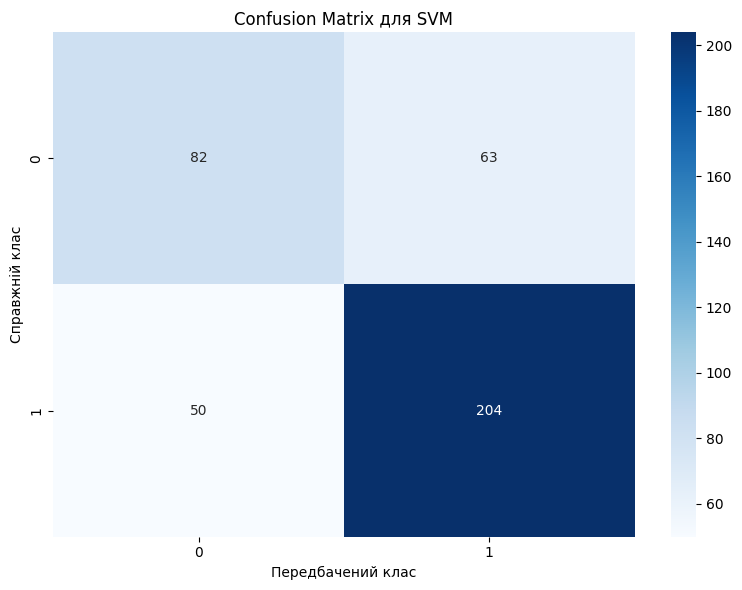


Classification Report для SVM:
              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59       145
         1.0       0.76      0.80      0.78       254

    accuracy                           0.72       399
   macro avg       0.69      0.68      0.69       399
weighted avg       0.71      0.72      0.71       399



In [6]:
results = {}

# 5.3 SVM з підбором оптимальних параметрів
print("5.3 Навчання SVM з підбором параметрів.")
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf','linear']
}

start_time_svm = time.time()
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train_scaled, y_train)
end_time_svm = time.time()
training_time_svm = end_time_svm - start_time_svm


print(f"Оптимальні параметри SVM: {svm_grid.best_params_}")
y_pred_svm = svm_grid.predict(X_test_scaled)
results['SVM_accuracy'] = accuracy_score(y_test, y_pred_svm)
results['SVM_time'] = training_time_svm

print(f"Точність SVM: {results['SVM_accuracy']:.4f}")
print(f"Час навчання SVM: {results['SVM_time']:.4f} секунд")


# Confusion Matrix і Classification Report для SVM
print("\nConfusion Matrix для SVM:")
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix для SVM')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

print("\nClassification Report для SVM:")
print(classification_report(y_test, y_pred_svm))

  Пояснено 71.02% варіації даних
  Компонента 1: 50.12%
  Компонента 2: 20.90%


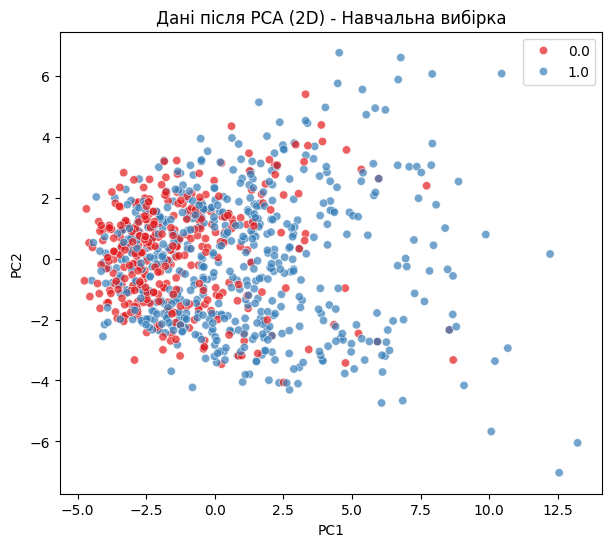

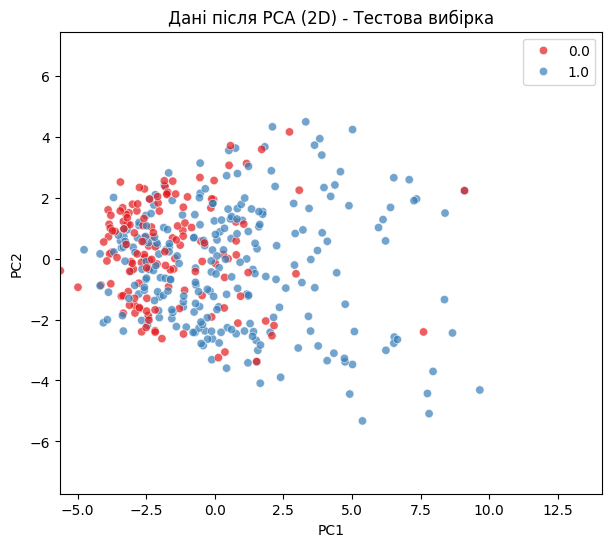

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_var = pca.explained_variance_ratio_.sum() * 100

print(f"  Пояснено {explained_var:.2f}% варіації даних")
print(f"  Компонента 1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  Компонента 2: {pca.explained_variance_ratio_[1]*100:.2f}%")

#  Візуалізація точок
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue=y_train,
    palette="Set1",
    alpha=0.7
)

plt.title("Дані після PCA (2D) - Навчальна вибірка")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# Збереження меж осей (xlim/ylim)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.show()

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=X_test_pca[:, 0],
    y=X_test_pca[:, 1],
    hue=y_test,
    palette="Set1",
    alpha=0.7
)

plt.title("Дані після PCA (2D) - Тестова вибірка")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Найкращі параметри: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Найкращий скор (CV): 0.6827956989247312
Час навчання SVM з PCA: 3.7598 секунд


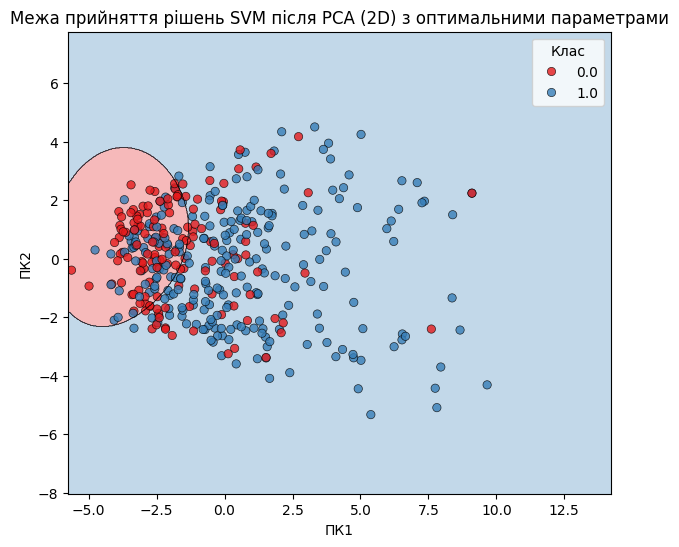

Accuracy SVM_PCA: 0.6867


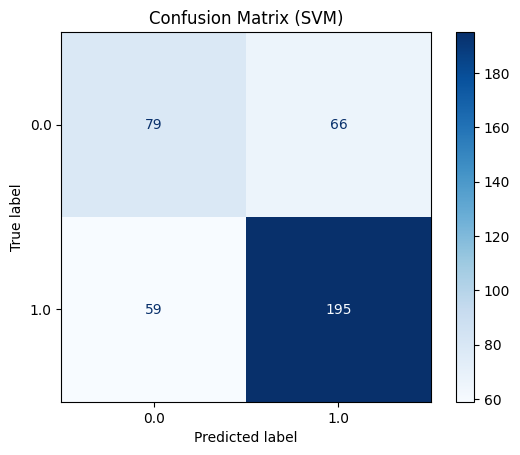


Classification Report (SVM):
              precision    recall  f1-score   support

         0.0       0.57      0.54      0.56       145
         1.0       0.75      0.77      0.76       254

    accuracy                           0.69       399
   macro avg       0.66      0.66      0.66       399
weighted avg       0.68      0.69      0.68       399



In [8]:
# Сітка параметрів
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

start_time_svm_pca = time.time()
# GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_pca, y_train)
end_time_svm_pca = time.time()
training_time_svm_pca = end_time_svm_pca - start_time_svm_pca

print("Найкращі параметри:", grid.best_params_)
print("Найкращий скор (CV):", grid.best_score_)
print(f"Час навчання SVM з PCA: {training_time_svm_pca:.4f} секунд")


# Найкраща модель
svm_clf = grid.best_estimator_

# Побудова decision boundary для найкращої SVM
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Прогноз
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Перетворюємо класи у числа
le = LabelEncoder().fit(y_train) # Use y_train to fit the encoder
Z_num = le.transform(Z).reshape(xx.shape)

# Єдина палітра для boundary та точок
unique_classes = svm_clf.classes_
palette = dict(zip(unique_classes, sns.color_palette("Set1",
                                                     n_colors=len(unique_classes))))

plt.figure(figsize=(7, 6))

# Заливка областей
plt.contourf(xx, yy, Z_num, alpha=0.3,
             levels=np.arange(len(unique_classes) + 1) - 0.5,
             colors=[palette[c] for c in unique_classes])

# Лінії меж
plt.contour(xx, yy, Z_num, colors="k", linewidths=0.1)

# Тестові точки
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test,
                palette=palette, alpha=0.8, edgecolor="k")

plt.title("Межа прийняття рішень SVM після PCA (2D) з оптимальними параметрами")
plt.xlabel("ПК1")
plt.ylabel("ПК2")
plt.legend(title="Клас")
plt.show()

# Прогноз на тестових даних
y_pred_pca = svm_clf.predict(X_test_pca)

# Accuracy
acc = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy SVM_PCA: {acc:.4f}")
results['SVM_PCA_accuracy'] = acc
results['SVM_PCA_time'] = training_time_svm_pca


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_pca, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification Report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_pca))

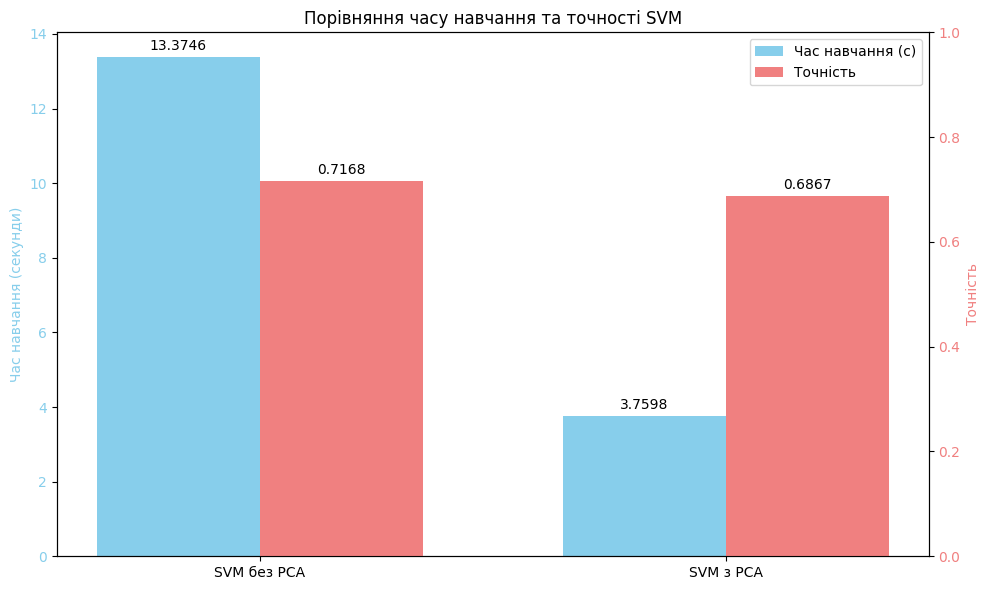

In [9]:
# Візуалізація часу навчання та точності
labels = ['SVM без PCA', 'SVM з PCA']
training_times = [results['SVM_time'], results['SVM_PCA_time']]
accuracies = [results['SVM_accuracy'], results['SVM_PCA_accuracy']]

x = np.arange(len(labels))  # позиції міток на осі x
width = 0.35  # ширина стовпців

fig, ax1 = plt.subplots(figsize=(10, 6))

# Побудова часу навчання на першій осі y
rects1 = ax1.bar(x - width/2, training_times, width, label='Час навчання (с)', color='skyblue')
ax1.set_ylabel('Час навчання (секунди)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('Порівняння часу навчання та точності SVM')
ax1.grid(False)

# Побудова точності на другій осі y
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, accuracies, width, label='Точність', color='lightcoral')
ax2.set_ylabel('Точність', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1) # Точність від 0 до 1

# Додавання міток та легенди
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Додавання числових значень над стовпцями
def autolabel(rects, ax, format_string):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(format_string.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 точки вертикального зсуву
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1, '{:.4f}')
autolabel(rects2, ax2, '{:.4f}')


plt.show()

In [10]:
# Об'єднуємо train та test для t-SNE
X_combined = np.vstack([X_train_scaled, X_test_scaled])
n_train = len(X_train_scaled)

# Ініціалізація t-SNE з покращеними параметрами
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    n_iter=1000,
    learning_rate=200,  # Auto = n_samples / early_exaggeration / 4
    #init='pca',
    verbose=1
)

# Застосування t-SNE
print(f"Розмір об'єднаних даних: {X_combined.shape}")
X_combined_tsne = tsne.fit_transform(X_combined)

# Розділяємо назад на train та test
X_train_tsne = X_combined_tsne[:n_train]
X_test_tsne = X_combined_tsne[n_train:]

print(f"Розмірність навчальної вибірки після t-SNE: {X_train_tsne.shape}")
print(f"Розмірність тестової вибірки після t-SNE: {X_test_tsne.shape}")


Розмір об'єднаних даних: (1329, 19)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1329 samples in 0.001s...
[t-SNE] Computed neighbors for 1329 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1329
[t-SNE] Computed conditional probabilities for sample 1329 / 1329
[t-SNE] Mean sigma: 0.970303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.851196
[t-SNE] KL divergence after 1000 iterations: 1.112009
Розмірність навчальної вибірки після t-SNE: (930, 2)
Розмірність тестової вибірки після t-SNE: (399, 2)


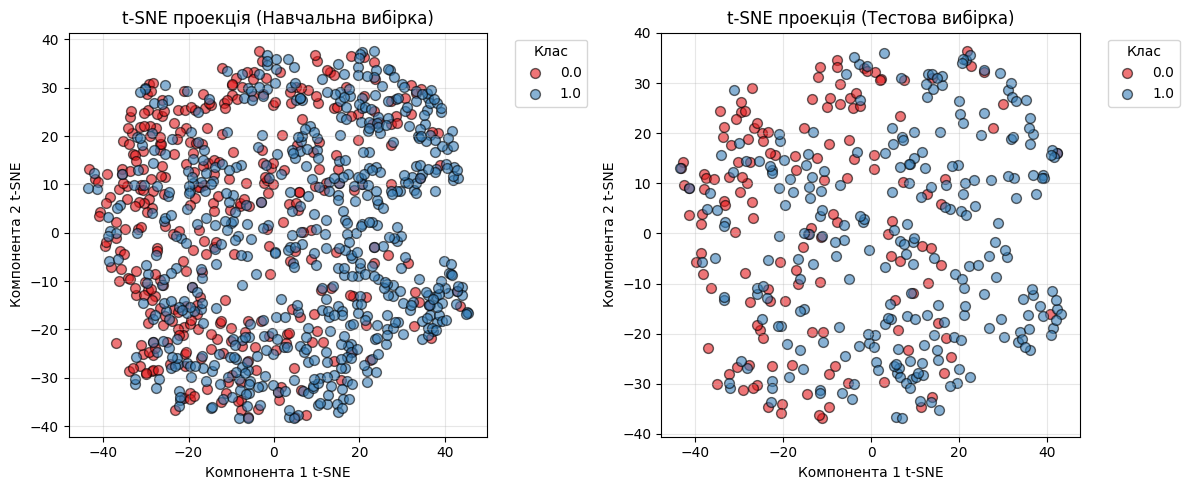

In [11]:
plt.figure(figsize=(12, 5))

# Навчальна вибірка
plt.subplot(1, 2, 1)
unique_classes = np.unique(y_train)
palette = sns.color_palette("Set1", n_colors=len(unique_classes))
for i, cls in enumerate(unique_classes):
    mask = y_train == cls
    plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1],
                c=[palette[i]], label=cls, alpha=0.6, edgecolor='k', s=50)
plt.title("t-SNE проекція (Навчальна вибірка)")
plt.xlabel("Компонента 1 t-SNE")
plt.ylabel("Компонента 2 t-SNE")
plt.legend(title="Клас", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Тестова вибірка
plt.subplot(1, 2, 2)
for i, cls in enumerate(unique_classes):
    mask = y_test == cls
    plt.scatter(X_test_tsne[mask, 0], X_test_tsne[mask, 1],
                c=[palette[i]], label=cls, alpha=0.6, edgecolor='k', s=50)
plt.title("t-SNE проекція (Тестова вибірка)")
plt.xlabel("Компонента 1 t-SNE")
plt.ylabel("Компонента 2 t-SNE")
plt.legend(title="Клас", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Сітка параметрів
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Засікаємо час
start_time_svm_tsne = time.time()

# GridSearchCV
grid_tsne = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Навчання
print("Навчання моделі...")
grid_tsne.fit(X_train_tsne, y_train)

# Час навчання
end_time_svm_tsne = time.time()
training_time_svm_tsne = end_time_svm_tsne - start_time_svm_tsne

# Результати
print("\n" + "="*50)
print(f" Найкращі параметри: {grid_tsne.best_params_}")
print(f" Найкращий CV score: {grid_tsne.best_score_:.4f}")
print(f" Час навчання: {training_time_svm_tsne:.2f} сек")
print("="*50)

# Зберігаємо результати
svm_tsne_clf = grid_tsne.best_estimator_
results['SVM_TSNE_time'] = training_time_svm_tsne

Навчання моделі...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

 Найкращі параметри: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
 Найкращий CV score: 0.6763
 Час навчання: 25.78 сек


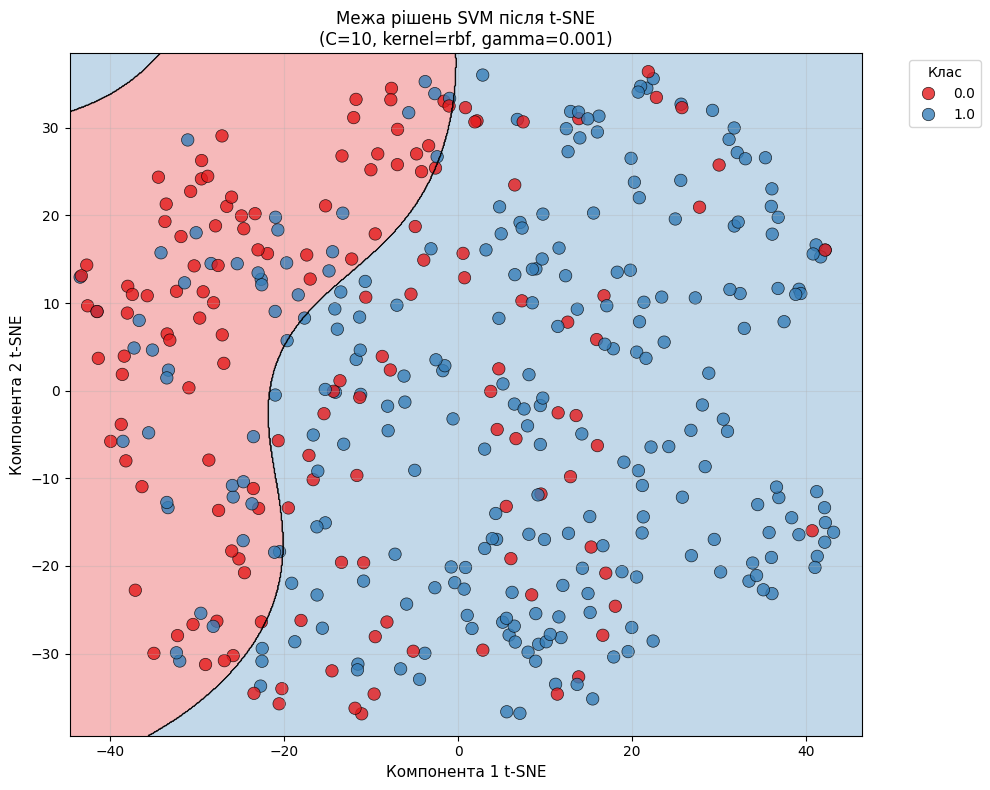

In [13]:
# Параметри сітки
h = 0.1
x_min, x_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
y_min, y_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1

# Створення сітки
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Передбачення для сітки
Z = svm_tsne_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_num = le.transform(Z).reshape(xx.shape)

# Палітра кольорів
unique_classes_tsne = svm_tsne_clf.classes_
palette_tsne = dict(zip(unique_classes_tsne,
                        sns.color_palette("Set1", n_colors=len(unique_classes_tsne))))

# Побудова графіка
plt.figure(figsize=(10, 8))

# Заливка областей
plt.contourf(xx, yy, Z_num, alpha=0.3,
             levels=np.arange(len(unique_classes_tsne) + 1) - 0.5,
             colors=[palette_tsne[c] for c in unique_classes_tsne])

# Межі між класами
plt.contour(xx, yy, Z_num, colors="k", linewidths=0.5, alpha=0.5)

# Тестові точки
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1],
                hue=y_test, palette=palette_tsne,
                alpha=0.8, edgecolor="k", s=80, linewidth=0.5)

plt.title(f"Межа рішень SVM після t-SNE\n(C={grid_tsne.best_params_['C']}, "
          f"kernel={grid_tsne.best_params_['kernel']}, "
          f"gamma={grid_tsne.best_params_['gamma']})", fontsize=12)
plt.xlabel("Компонента 1 t-SNE", fontsize=11)
plt.ylabel("Компонента 2 t-SNE", fontsize=11)
plt.legend(title="Клас", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


 Accuracy (SVM + t-SNE): 0.7168


<Figure size 800x600 with 0 Axes>

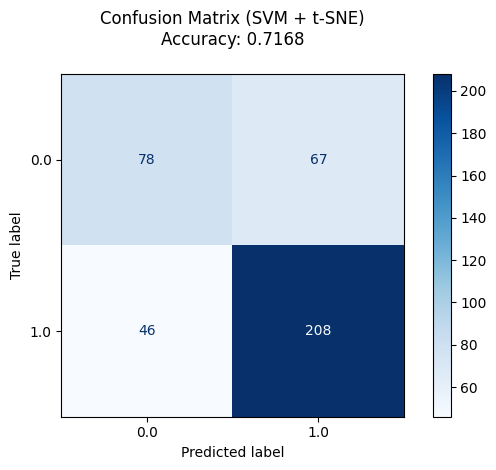

Classification Report (SVM + t-SNE):
              precision    recall  f1-score   support

         0.0       0.63      0.54      0.58       145
         1.0       0.76      0.82      0.79       254

    accuracy                           0.72       399
   macro avg       0.69      0.68      0.68       399
weighted avg       0.71      0.72      0.71       399



In [14]:
# Передбачення на тестових даних
y_pred_tsne = svm_tsne_clf.predict(X_test_tsne)

# Точність
acc_tsne = accuracy_score(y_test, y_pred_tsne)
print(f"\n Accuracy (SVM + t-SNE): {acc_tsne:.4f}")
results['SVM_TSNE_accuracy'] = acc_tsne

# Матриця помилок
cm_tsne = confusion_matrix(y_test, y_pred_tsne, labels=svm_tsne_clf.classes_)
plt.figure(figsize=(8, 6))
disp_tsne = ConfusionMatrixDisplay(confusion_matrix=cm_tsne,
                                    display_labels=svm_tsne_clf.classes_)
disp_tsne.plot(cmap=plt.cm.Blues, values_format="d")
plt.title(f"Confusion Matrix (SVM + t-SNE)\nAccuracy: {acc_tsne:.4f}\n")
plt.tight_layout()
plt.show()

# Звіт про класифікацію
print("Classification Report (SVM + t-SNE):")
print(classification_report(y_test, y_pred_tsne))

Довжина міток: 3
Довжина часу навчання: 3
Довжина точності: 3


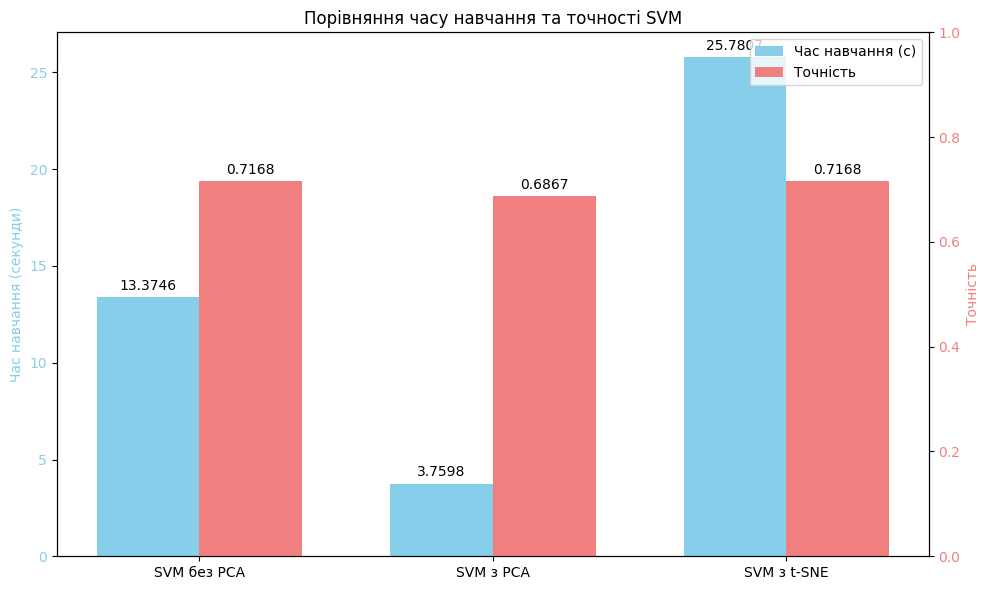

In [15]:
# Оновлюю списки міток, часу навчання та точності
labels.append('SVM з t-SNE')
training_times.append(results['SVM_TSNE_time'])
accuracies.append(results['SVM_TSNE_accuracy'])

# Перевірка, що списки мають однакову довжину
print(f"Довжина міток: {len(labels)}")
print(f"Довжина часу навчання: {len(training_times)}")
print(f"Довжина точності: {len(accuracies)}")


x = np.arange(len(labels))  # позиції міток на осі x
width = 0.35  # ширина стовпців

fig, ax1 = plt.subplots(figsize=(10, 6))

# Побудова часу навчання на першій осі y
rects1 = ax1.bar(x - width/2, training_times, width, label='Час навчання (с)', color='skyblue')
ax1.set_ylabel('Час навчання (секунди)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('Порівняння часу навчання та точності SVM')

# Побудова точності на другій осі y
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, accuracies, width, label='Точність', color='lightcoral')
ax2.set_ylabel('Точність', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1) # Точність від 0 до 1

# Додавання міток та легенди
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Додавання числових значень над стовпцями
def autolabel(rects, ax, format_string):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(format_string.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 точки вертикального зсуву
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1, '{:.4f}')
autolabel(rects2, ax2, '{:.4f}')


plt.show()

Image shape: (736, 736, 3)
dtype: uint8


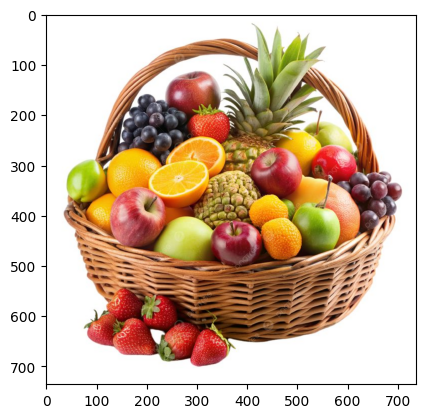

In [16]:
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/fruits.jpg")

#  Перевірка RGB
if len(img.shape) == 2:
    img = np.stack((img,) * 3, axis=-1)

H, W, C = img.shape
print("Image shape:", img.shape)
print("dtype:", img.dtype)
plt.imshow(img)
plt.show()

In [17]:
#Формат uint8 дозволяє закодувати 16,7 мільйона кольорів (кількість можливих комбінацій у зображені з трьома каналами)
#256×256×256 (але кожне конкретне зображення зазвичай містить значно менше унікальних кольорів)
unique_colors = np.unique(img.reshape(-1, 3), axis=0)
print("Унікальних кольорів у вихідному зображені:", unique_colors.shape[0])

Унікальних кольорів у вихідному зображені: 205990


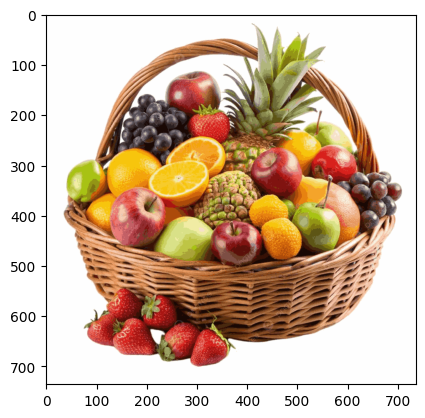

Унікальних кольорів в перетвореному зображені: 64 



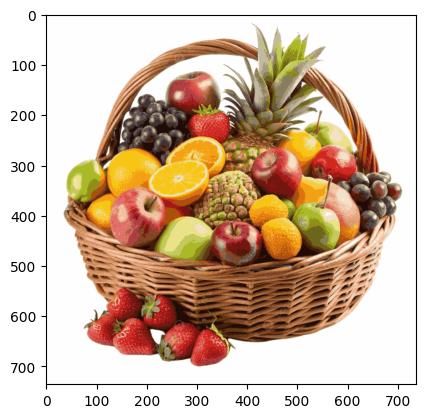

Унікальних кольорів в перетвореному зображені: 32 



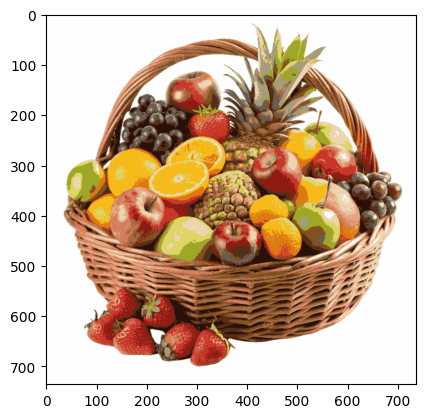

Унікальних кольорів в перетвореному зображені: 16 



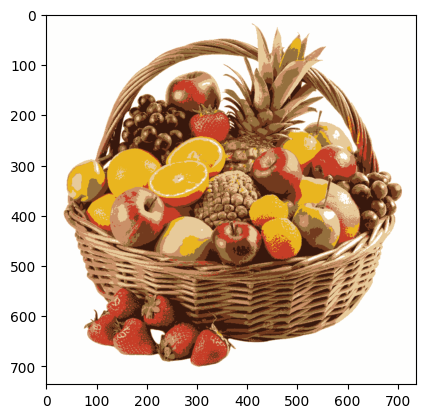

Унікальних кольорів в перетвореному зображені: 8 



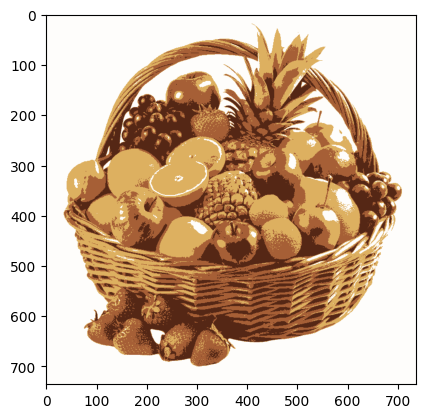

Унікальних кольорів в перетвореному зображені: 4 



In [18]:
data = img / 255.0  # нормалізація до [0,1]
pixels = data.reshape(-1, 3)

k_list = [64,32,16,8,4]
for k in k_list:
  #K-means працює у цьому 3-вимірному просторі: шукає «близькі» вектори і об’єднує їх у кластери
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  kmeans.fit(pixels)
  new_colors = kmeans.cluster_centers_[kmeans.labels_]
  quantized_img = new_colors.reshape(img.shape)

  plt.imshow(quantized_img)
  plt.show()
  unique_colors_quant = np.unique(quantized_img.reshape(-1, 3), axis=0)
  print("Унікальних кольорів в перетвореному зображені:", unique_colors_quant.shape[0],"\n")


In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Налаштування
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
dft = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv")

In [21]:
dft.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [22]:
dft = dft.drop(['at', 'replyContent', 'repliedAt', 'appVersion', 'reviewId'], axis=1)

In [23]:
dft.head()

,content,score,thumbsUpCount,reviewCreatedVersion,predicted_category,sentiment
0,woww,5,0,NaN,USER_EXPERIENCE,NEUTRAL
1,let me know more details about this,3,0,4.5.1143533,CONTENT,NEUTRAL
2,i've been using this for a while and there's a...,2,0,4.5.1143533,INTERFACE,NEGATIVE
3,good,2,0,4.5.1143533,USER_EXPERIENCE,POSITIVE
4,mjkobe,5,0,4.5.1143533,USER_EXPERIENCE,NEUTRAL


In [24]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        # Токени назад до рядка
        return ' '.join(filtered_tokens)
    else:
        return ""

dft['content_preprocessed'] = dft['content'].apply(preprocess_text)
display(dft.head())

,content,score,thumbsUpCount,reviewCreatedVersion,predicted_category,sentiment,content_preprocessed
0,woww,5,0,NaN,USER_EXPERIENCE,NEUTRAL,woww
1,let me know more details about this,3,0,4.5.1143533,CONTENT,NEUTRAL,let know details
2,i've been using this for a while and there's a...,2,0,4.5.1143533,INTERFACE,NEGATIVE,ive using theres basic bug still fixed scrolli...
3,good,2,0,4.5.1143533,USER_EXPERIENCE,POSITIVE,good
4,mjkobe,5,0,4.5.1143533,USER_EXPERIENCE,NEUTRAL,mjkobe


In [25]:
grouped_text = dft.groupby('sentiment')['content_preprocessed'].apply(lambda x: ' '.join(x)).to_dict()

In [26]:
for sentiment, text in list(grouped_text.items())[:3]:
    print(f"Sentiment: {sentiment}")
    print(f"Sample Text: {text[:200]}...\n")

Sentiment: NEGATIVE
Sample Text: ive using theres basic bug still fixed scrolling articles start repeat sometimes even multiple times basic search functionality non existent results irrespective search profile linkusername case commo...

Sentiment: NEUTRAL
Sample Text: woww let know details mjkobe wow latest update seems make app seamless compact hard keep writing editing features extra tab app would gladly become ux ui researchet given chance smh write post keeps t...

Sentiment: POSITIVE
Sample Text: good good awesome likes read different topics great work developing app best thing discovered life thats calls natures gift didnt wish also changed entire life thankful creator people platform changin...



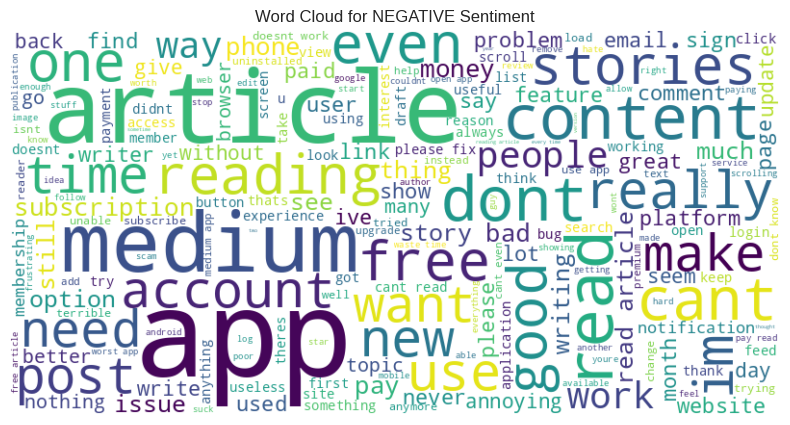

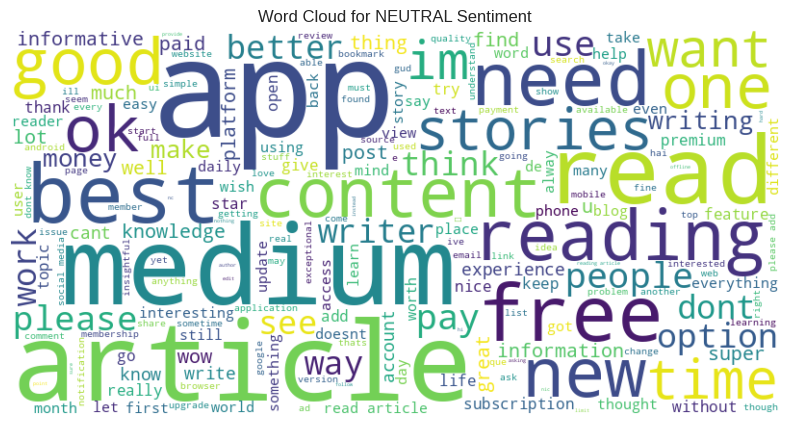

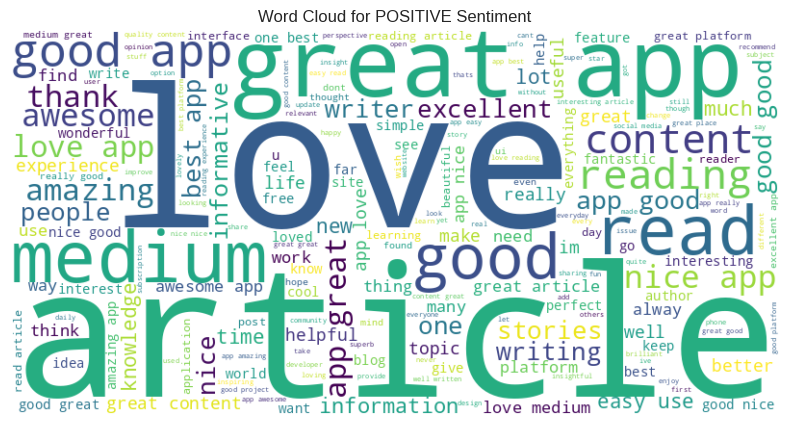

In [27]:
for sentiment, text in grouped_text.items():
    # Створення WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Виведення інформації
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis("off")
    plt.show()

In [28]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(dft['content_preprocessed'])

print("Shape of X_tfidf:", X_tfidf.shape)

Shape of X_tfidf: (62633, 23971)


In [29]:
from sklearn.model_selection import train_test_split

# Визначаємо цільову змінну
y_sentiment = dft['sentiment']

# Розділяємо дані на навчальну та тестову вибірки
X_train_tfidf, X_test_tfidf, y_train_sentiment, y_test_sentiment = train_test_split(
    X_tfidf, y_sentiment, test_size=0.3, random_state=42, stratify=y_sentiment
)

print(f"Розмір навчальної вибірки (TF-IDF): {X_train_tfidf.shape}")
print(f"Розмір тестової вибірки (TF-IDF): {X_test_tfidf.shape}")
print(f"\nРозподіл класів у y_train_sentiment:\n{y_train_sentiment.value_counts(normalize=True)}")
print(f"\nРозподіл класів у y_test_sentiment:\n{y_test_sentiment.value_counts(normalize=True)}")

Розмір навчальної вибірки (TF-IDF): (43843, 23971)
Розмір тестової вибірки (TF-IDF): (18790, 23971)

Розподіл класів у y_train_sentiment:
sentiment
POSITIVE    0.751637
NEUTRAL     0.139178
NEGATIVE    0.109185
Name: proportion, dtype: float64

Розподіл класів у y_test_sentiment:
sentiment
POSITIVE    0.751623
NEUTRAL     0.139223
NEGATIVE    0.109154
Name: proportion, dtype: float64


In [30]:
# Ініціалізація моделі Multinomial Naive Bayes
model_nb = MultinomialNB()

# Навчання моделі на навчальних даних
model_nb.fit(X_train_tfidf, y_train_sentiment)


MultinomialNB()

 Оцінка моделі 

 Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.87      0.41      0.55      2051
     NEUTRAL       0.92      0.11      0.20      2616
    POSITIVE       0.80      1.00      0.89     14123

    accuracy                           0.81     18790
   macro avg       0.86      0.50      0.55     18790
weighted avg       0.83      0.81      0.76     18790


 Confusion Matrix:


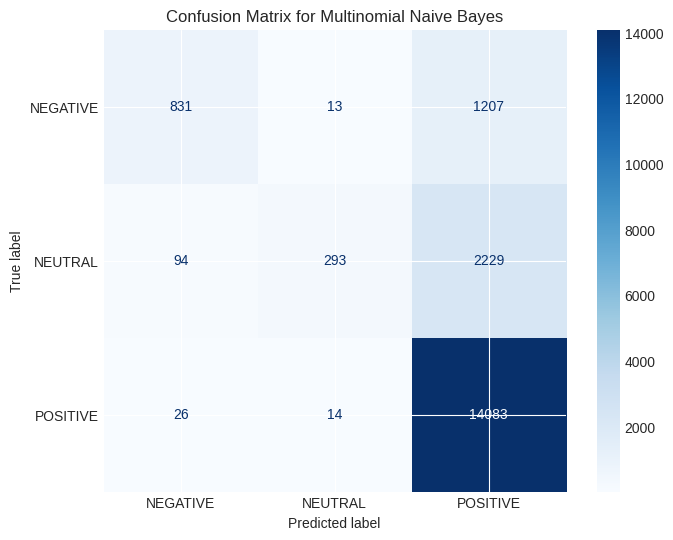

In [31]:
# Прогноз на тестових даних
y_pred_sentiment = model_nb.predict(X_test_tfidf)

# Оцінка моделі
print(" Оцінка моделі ")

# Звіт про класифікацію
print("\n Classification Report:")
print(classification_report(y_test_sentiment, y_pred_sentiment))

# Матриця плутанини
print("\n Confusion Matrix:")
cm_sentiment = confusion_matrix(y_test_sentiment, y_pred_sentiment)
disp_sentiment = ConfusionMatrixDisplay(confusion_matrix=cm_sentiment, display_labels=model_nb.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_sentiment.plot(cmap=plt.cm.Blues, values_format="d", ax=ax)
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

In [32]:
accuracy_nb = accuracy_score(y_test_sentiment, y_pred_sentiment)
print(f"Точність моделі Multinomial Naive Bayes: {accuracy_nb:.4f}")

Точність моделі Multinomial Naive Bayes: 0.8093


 Оцінка моделі Логістичної Регресії 

 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    NEGATIVE       0.81      0.65      0.72      2051
     NEUTRAL       0.70      0.57      0.63      2616
    POSITIVE       0.91      0.97      0.94     14123

    accuracy                           0.88     18790
   macro avg       0.81      0.73      0.76     18790
weighted avg       0.87      0.88      0.87     18790


 Confusion Matrix (Logistic Regression):


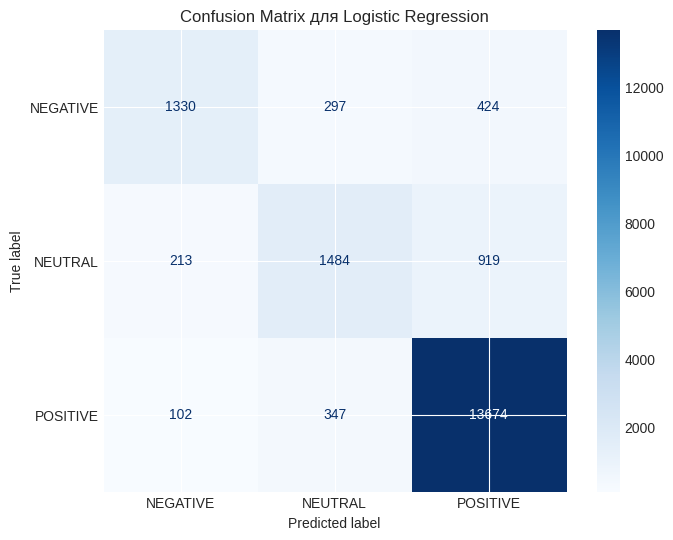

Точність моделі Linear Regression: 0.8775


In [33]:
# Ініціалізація моделі Логістичної Регресії
# Використовуємо solver='liblinear' для багатокласової класифікації на TF-IDF даних
# Increased max_iter for convergence
model_lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Навчання моделі
model_lr.fit(X_train_tfidf, y_train_sentiment)

# Прогноз на тестових даних
y_pred_lr = model_lr.predict(X_test_tfidf)

# Оцінка моделі
print(" Оцінка моделі Логістичної Регресії ")

# Звіт про класифікацію
print("\n Classification Report (Logistic Regression):")
print(classification_report(y_test_sentiment, y_pred_lr))

# Матриця плутанини
print("\n Confusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test_sentiment, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model_lr.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_lr.plot(cmap=plt.cm.Blues, values_format="d", ax=ax)
plt.title("Confusion Matrix для Logistic Regression")
plt.show()

accuracy_lr = accuracy_score(y_test_sentiment, y_pred_lr)
print(f"Точність моделі Linear Regression: {accuracy_lr:.4f}")

 Оцінка моделі Random Forest 

 Classification Report (Random Forest):
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.63      0.70      2051
     NEUTRAL       0.71      0.61      0.66      2616
    POSITIVE       0.91      0.96      0.93     14123

    accuracy                           0.87     18790
   macro avg       0.80      0.73      0.76     18790
weighted avg       0.87      0.87      0.87     18790


 Confusion Matrix (Random Forest):


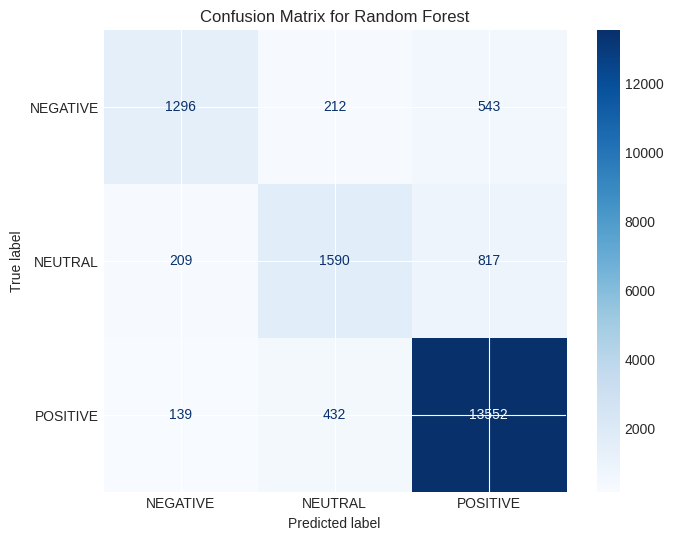

Точність моделі Random Forest: 0.8748


In [34]:
# Ініціалізація моделі Random Forest
# Використовуємо невелику кількість estimators для швидшого виконання
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Навчання моделі
model_rf.fit(X_train_tfidf, y_train_sentiment)

# Прогноз на тестових даних
y_pred_rf = model_rf.predict(X_test_tfidf)

# Оцінка моделі
print(" Оцінка моделі Random Forest ")

# Звіт про класифікацію
print("\n Classification Report (Random Forest):")
print(classification_report(y_test_sentiment, y_pred_rf))

# Матриця плутанини
print("\n Confusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test_sentiment, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap=plt.cm.Blues, values_format="d", ax=ax)
plt.title("Confusion Matrix for Random Forest")
plt.show()

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test_sentiment, y_pred_rf)
print(f"Точність моделі Random Forest: {accuracy_rf:.4f}")